In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import gridspec

import dataset

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


In [3]:
train_ds = dataset.train()
train_ds = torch.tensor(train_ds, device=device)
train_ds.shape

torch.Size([100, 14, 40, 30])

In [4]:
train_min = train_ds.min().item()
train_max = train_ds.max().item()
print(train_min)
print(train_max)

0.013301106169819832
0.7538727521896362


In [5]:
test_ds = dataset.test()
test_ds = torch.tensor(test_ds, device=device)
test_ds.shape

torch.Size([100, 12, 40, 30])

In [6]:
test_min = test_ds.min().item()
test_max = test_ds.max().item()
print(test_min)
print(test_max)

0.01412084698677063
0.8370891809463501


In [7]:
row_p = [0, 15, 30]
col_p = [0, 10, 26, 33, 40]


def split4(x: torch.Tensor):
    res = []
    for j in range(len(col_p) - 1):
        for i in range(len(row_p) - 1):
            m = x[:, :, col_p[j]:col_p[j + 1], row_p[i]:row_p[i + 1]]
            res.append(m.contiguous())
    return res


train_ds_block = split4(train_ds)
test_ds_block = split4(test_ds)

In [8]:
row_x = [row_p[1]-row_p[0], row_p[2]-row_p[1]]
col_x = [col_p[1]-col_p[0], col_p[2]-col_p[1], col_p[3]-col_p[2],col_p[4]-col_p[3]]

In [9]:
def get_block(clazz, im):
    y = []
    for b in test_ds_block:
        y.append(b[clazz, im, :, :])
    return y


In [10]:
def plot_blocks(arr, nrows, ncols):
    fig = plt.figure(figsize=(6.3, 8))
    gs = gridspec.GridSpec(nrows, ncols,
                           width_ratios=row_x,
                           height_ratios=col_x)
    for i, b in enumerate(arr):
        ax_i = plt.subplot(gs[i])
        im = ax_i.imshow(b, cmap='gray')
        ax_i.axis('off')
        im.set_clim(test_min, test_max)
    plt.tight_layout(pad=0.1)
    plt.show()
    return fig


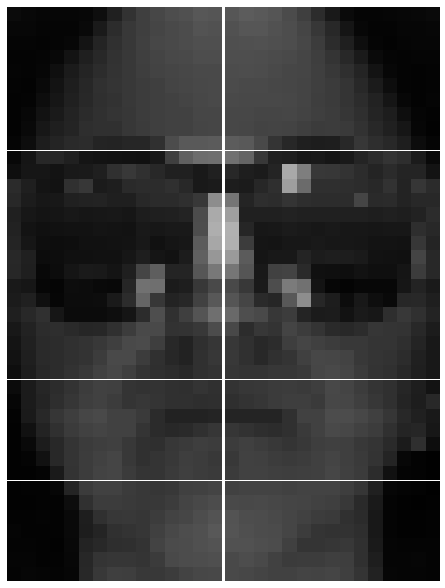

In [11]:
clazz = 55
im = 6
y = get_block(clazz, im)
fig = plot_blocks(y, 4, 2)
fig.savefig('block_sample.png')

In [12]:
for i in y:
    print(i.shape)


torch.Size([10, 15])
torch.Size([10, 15])
torch.Size([16, 15])
torch.Size([16, 15])
torch.Size([7, 15])
torch.Size([7, 15])
torch.Size([7, 15])
torch.Size([7, 15])


In [13]:
18*15

270